<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: 1.0 Data cleaning, preprocessing and EDA - Obesity

> Authors: Michael King Sutanto, Eugene Matthew Cheong, Pius Yee

## Introduction

Obesity and stroke are major health concerns facing society today. The World Health Organization (WHO) estimates that over 650 million adults are living with obesity, and stroke is the second leading cause of death globally. These conditions not only cause significant individual suffering but also place a tremendous burden on healthcare systems.

##### Obesity

The health risks caused by overweight and obesity are increasingly well documented and understood.
In 2019, higher-than-optimal BMI caused an estimated 5 million deaths from noncommunicable diseases (NCDs) such as cardiovascular diseases, diabetes, cancers, neurological disorders, chronic respiratory diseases, and digestive disorders 

(1). Being overweight in childhood and adolescence affects children’s and adolescents’ immediate health and is associated with greater risk and earlier onset of various NCDs, such as type 2 diabetes and cardiovascular disease. Childhood and adolescent obesity have adverse psychosocial consequences; it affects school performance and quality of life, compounded by stigma, discrimination and bullying. Children with obesity are very likely to be adults with obesity and are also at a higher risk of developing NCDs in adulthood.
The economic impacts of the obesity epidemic are also important. If nothing is done, the global costs of overweight and obesity are predicted to reach US$ 3 trillion per year by 2030 and more than US$ 18 trillion by 2060 

(2).Finally, the rise in obesity rates in low-and middle-income countries, including among lower socio-economic groups, is fast globalizing a problem that was once associated only with high-income countries.

##### Stroke

Being overweight is one of the top ten risk factors for stroke and is associated with almost 1 in 5 strokes. 
Being categorised as overweight increases your risk of stroke by 22% and if you are obese that risk increases by 64%. This is because carrying too much weight increases your risk of high blood pressure, heart disease, high cholesterol and type 2 diabetes which all contribute to higher stroke risk. Maintaining a healthy weight will help you reduce your risk of stroke.


Articles:
- [WHO - Obesity and overweight](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight)

- [World Stroke  - UNDERSTANDING
WEIGHT AND STROKE](https://www.world-stroke.org/assets/downloads/WSO_DontBeTheOne_PI_Leaflets_-_WEIGHT.pdf)

---
## Persona

This is a Ministry of Health (MoH) meeting. The Data Science team is presenting a structured, data-driven approach to quickly identify a patient's stroke risk. This model is highly valuable, as it aids doctors in timely risk identification. Stroke is a serious condition that often requires immediate action when a patient is at risk. As such, it could help the doctors identify patients at risk of stroke easier. The target audience for this presentation is the MOH stakeholders and doctors.

---
## Problem Statement

The healthcare system faces a challenge in quickly identifying patients at risk of stroke upon arrival at the emergency department (A&E), despite standardized triage protocols. Swiftly discerning stroke risk based on initial health particulars is difficult, leading to delays in referrals to specialists for preventive measures. 

How might we help A&E identify patients at risk of stroke easier?

---

## Approach

We will build 3 models to power different aspects of identifying patients at risk of stroke:

1) `Obesity classification model`: The model first determines obesity classification based on patient information, including factors like weekly physical activity frequency. This classification is then used as one of the features for the stroke predictor model below.

2) `Stroke Detector Model`: The model helps determine the probability of getting stroke based on patient information, together with the *obesity classification* from the earlier model.

3) `CT Scan Image Stroke Detector`: The model helps determine the probability of getting stroke based on CT scan images.

With these models, we are able to identify the risk of stroke promptly.

---


## Table of Contents ##

### Notebook 1.0 Data cleaning, preprocessing and EDA - Obesity ###

#### 1. Import Data

[1.1 Import Libraries](#1.1-import-libraries)

[1.2 Import CSV](#1.2-import-csv)

#### 2. Cleaning 

[2.1 Drop Duplicated Columns and Rename Columns and Values](#2.1-drop-duplicated-columns-and-rename-columns-and-values)

[2.2 Data dictionary](#2.2-data-dictionary)

#### 3. EDA

[3.1 Check Outliers For Numeric Columns](#3.1-check-outliers-for-numeric-columns)

[3.2 Heatmap for Numeric Columns](#3.2-heatmap-for-numeric-columns)

[3.3 Distribution for Numerical Columns](#3.3-distribution-for-numerical-columns)

#### 4. Export Clean Data

[4.0 Export Clean Data](#4-export-clean-data)


---

##### In this notebook 1.0, we will clean the obesity dataset before training the obesity classification model.

## 1. Import Data

Dataset is from kaggle

### 1.1 Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Import CSV

In [2]:
# import dataset for obesity
df = pd.read_csv('../datasets/obesity_level.csv')

In [3]:
# show the dataset
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# show the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
# Check null
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

No missing value in the obesity dataset.

## 2. Cleaning

### 2.1 Drop Duplicated Columns and Rename Columns and Values

In [6]:
# drop duplicated column id
df.drop(columns='id', inplace=True)

In [7]:
# Rename '0be1dad'to'obesity_status' to match stroke data
df.rename({'0be1dad':'obesity_status'}, axis=1, inplace=True)

In [8]:
# value counts for obesity status column
df['obesity_status'].value_counts()

obesity_status
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [9]:
# Combine overweight and rename all values to match stroke data
df['obesity_status'] = df['obesity_status'].replace({'Overweight_Level_I': 'overweight', 
                                                     'Overweight_Level_II': 'overweight',
                                                     'Insufficient_Weight': 'underweight',
                                                     '0rmal_Weight':'normal',
                                                     'Obesity_Type_I':'obesity_class_1',
                                                     'Obesity_Type_II':'obesity_class_2',
                                                     'Obesity_Type_III':'obesity_class_3'
                                                    })

In [10]:
# show the obesity status after combining
df['obesity_status'].value_counts()

obesity_status
overweight         4949
obesity_class_3    4046
obesity_class_2    3248
normal             3082
obesity_class_1    2910
underweight        2523
Name: count, dtype: int64

In [11]:
# Noted "0" in column CAEC and CALC
# Change 0 to "Never" for CAEC and CALC
for col in ['CAEC','CALC']:
    df[col] = df[col].map({"0": "Never",'Sometimes':'Sometimes', 'Frequently':'Frequently', 'Always':'Always'})

print(df['CAEC'].unique())
print(df['CALC'].unique())

['Sometimes' 'Frequently' 'Never' 'Always']
['Sometimes' 'Never' 'Frequently']


In [12]:
# show the amended dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_status
0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,overweight
1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,Never,Automobile,normal
2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,Never,Public_Transportation,underweight
3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,obesity_class_3
4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,overweight


##### After removing some duplicated features and rename features properly, below is the data dictionary.

### 2.2 Data dictionary

| Column Name | Description |
|---|---|
| Gender | The gender of the individual, 'Male' or 'Female'. |
| Age | The age of the individual. |
| Height | The height of the individual in meters. |
| Weight | The weight of the individual in kilograms. |
| family_history_with_overweight | A binary indicator (0 or 1) showing whether there is a family history of overweight. |
| FAVC | Frequent consumption of high-caloric food (0 or 1) where 1 indicates high consumption. |
| FCVC | Frequency of consumption of vegetables, on a scale (e.g., 1 to 3). |
| NCP | Number of main meals, numerical. |
| CAEC | Consumption of food between meals, with values like 'Sometimes', 'Frequently', etc. |
| SMOKE | A binary indicator (0 or 1) showing whether the individual smokes. |
| CH2O | Consumption of water daily, in liters. |
| SCC | Caloric beverages consumption (0 or 1) where 1 indicates high consumption.|
| FAF | Physical activity frequency, numerical. |
| TUE | Time using technology devices, numerical. |
| CALC | Alcohol consumption, with values like 'Sometimes', 'Frequently', etc. |
| MTRANS | Mode of transportation, with values like 'Public_Transportation', 'Bike', etc. |
| Obesity_status | Consist of underweight, normal, overweight, obesity_calls_1, obesity_calls_2, obesity_calls_3. | 


##### We have now cleaned the dataset and ready to proceed to EDA.

## 3. EDA

### 3.1 Check Outliers For Numeric Columns

In [13]:
# Numeric columns
num_col = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
num_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [14]:
# Categorical columns
cat_col = [i for i in list(df.columns) if i not in num_col]
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'obesity_status']

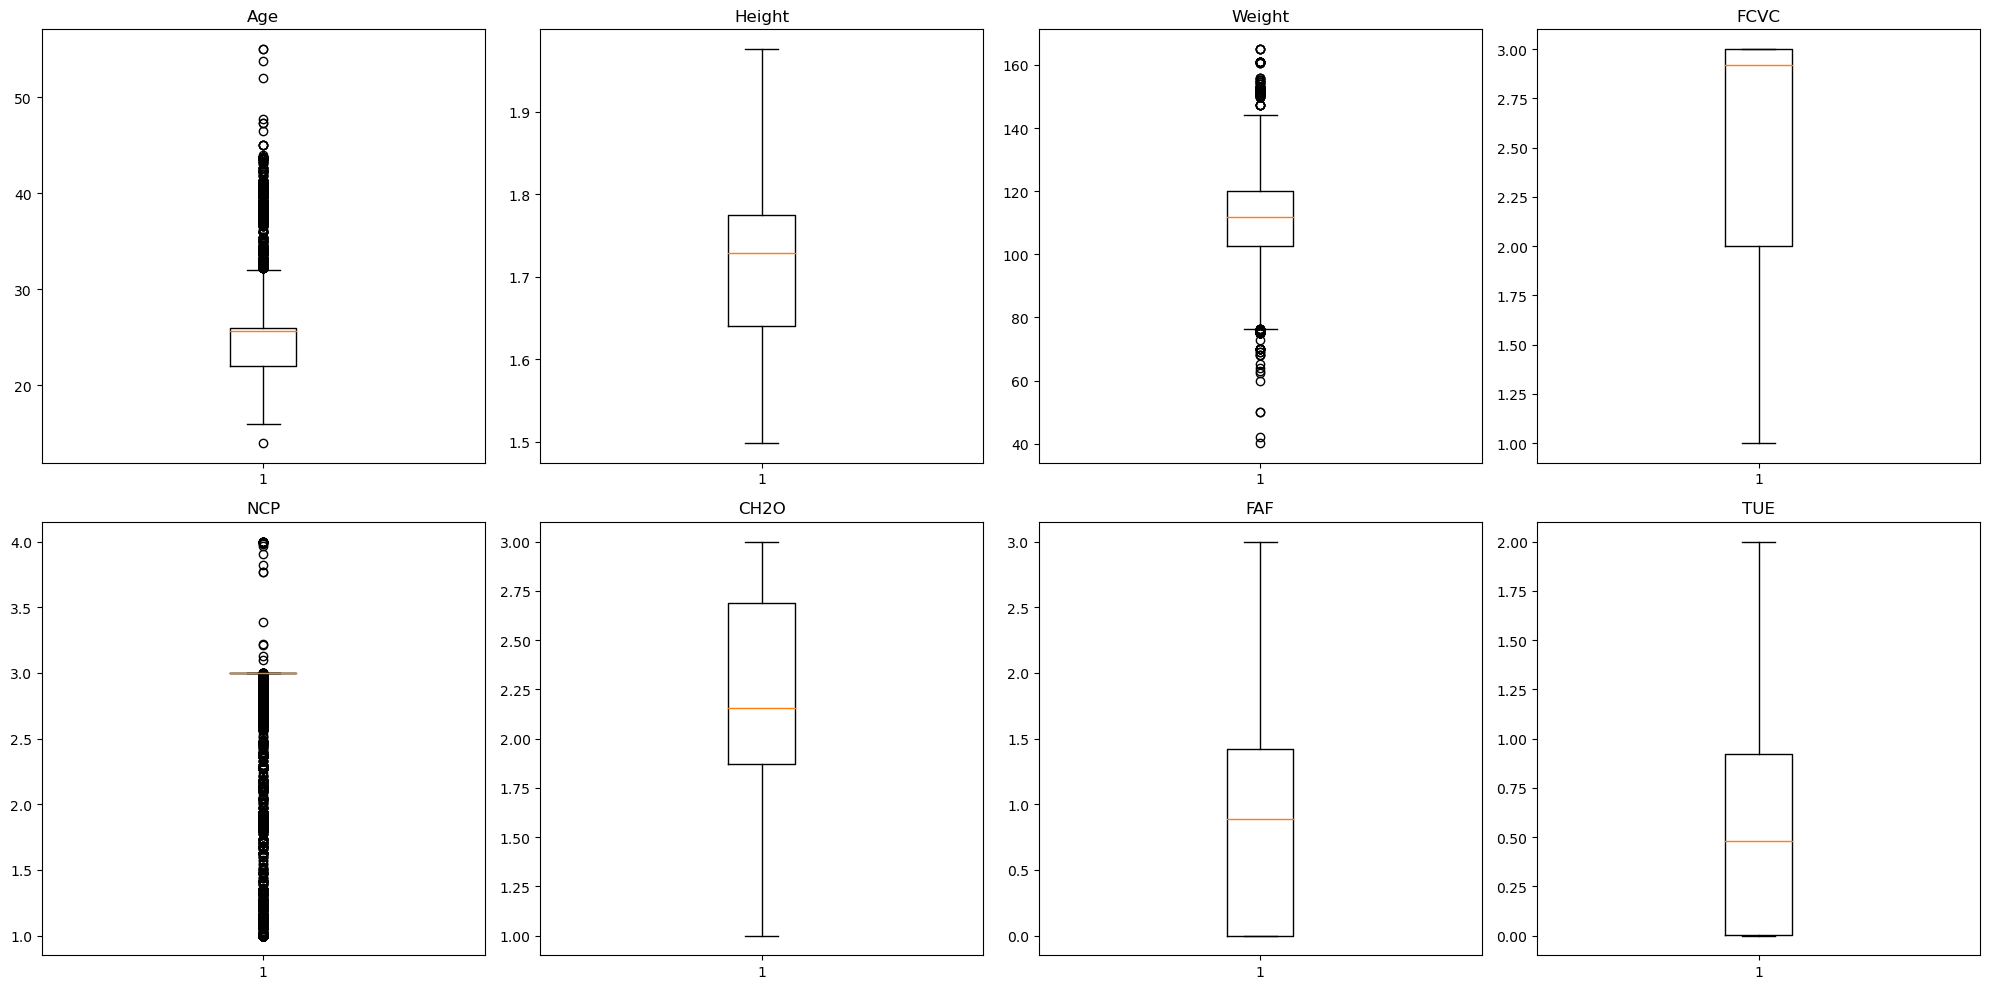

In [15]:
# Check outliers
plt.figure(figsize=(20, 10))

# create a dataframe for data with obesity only
df_obesity = df[(df.obesity_status == "obesity_class_1") | (df.obesity_status == "obesity_class_2") | (df.obesity_status == "obesity_class_3")]


# Creating boxplots for each numerical column
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_obesity[col]) # filtered with obesity only
    plt.title(col)

plt.tight_layout()
plt.show()

##### Based on the boxplots above, we can infer that the average person with obesity is approximately 25 years old, 175cm tall, and weighs around 110kg.

##### However, we noticed there are many outliers in "Age" which above 35. As such we further check the age > 35 as below.

In [16]:
# Check age outliers
df[df['Age']>35]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_status
25,Male,41.318302,1.853223,96.078462,1,1,2.000000,3.000000,Sometimes,0,3.000000,0,2.000000,0.000000,Frequently,Automobile,obesity_class_1
48,Female,37.000000,1.500000,80.000000,1,1,2.000000,3.000000,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Automobile,obesity_class_1
56,Male,55.272573,1.700000,80.000000,1,1,3.000000,3.000000,Sometimes,0,2.000000,0,0.979701,1.544357,Never,Automobile,overweight
80,Female,38.098745,1.560215,80.000000,1,1,2.020785,1.169173,Sometimes,0,1.872673,0,1.979355,0.000000,Sometimes,Automobile,obesity_class_1
83,Male,38.000000,1.750000,75.000000,1,1,3.000000,3.000000,Frequently,0,2.000000,0,2.000000,0.000000,Sometimes,Automobile,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20715,Female,38.088860,1.750000,62.855073,0,1,2.244654,3.000000,Sometimes,0,1.551266,0,0.271174,0.646514,Sometimes,Automobile,overweight
20725,Female,38.943282,1.565366,80.000000,1,1,2.008656,2.326233,Sometimes,0,1.837184,0,0.000000,0.000000,Never,Automobile,overweight
20732,Female,35.389491,1.642506,79.843221,1,1,2.000000,3.000000,Sometimes,0,1.000000,0,0.000000,0.057926,Never,Automobile,overweight
20739,Male,40.501722,1.619128,109.980145,1,1,2.731368,2.657720,Sometimes,0,1.000463,0,1.144876,0.474836,Sometimes,Public_Transportation,obesity_class_2


##### We will keep "Age" outliers, since we have around 1000 rows for age between 35-62.  
##### We will keep "Weight" outliers, since it's important for our model.
##### We will also keep "NCP" outliers, since it's normal to eat main meals 1-4 times a day.
##### We will also keep 1 "Height" above 195cm.

### 3.2 Heatmap for Numeric Columns

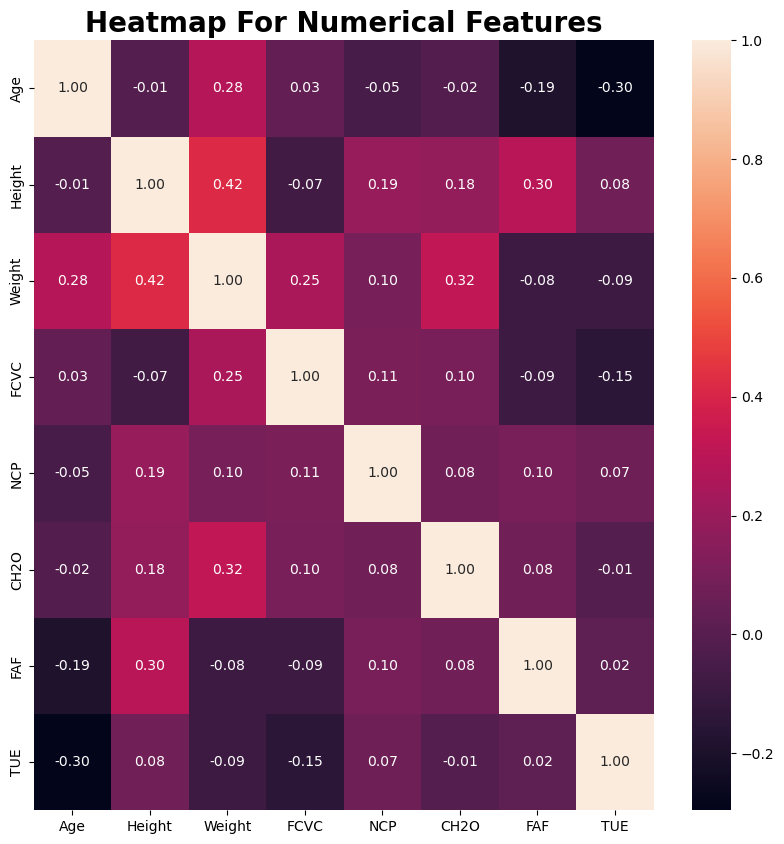

In [17]:
# Heat map
plt.figure(figsize=(10,10))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True,fmt='.2f')
plt.title('Heatmap For Numerical Features', fontsize=20, weight='bold')
plt.show()

##### We don't see any strong correlation.  
##### Some noticable correlations are height to weight 0.42, FAF(physical activity frequency) to height 0.3 and CH20 (Consumption of water daily) to weight.  
##### Not much insight we can get from heatmap.

### 3.3 Distribution for Numerical Columns

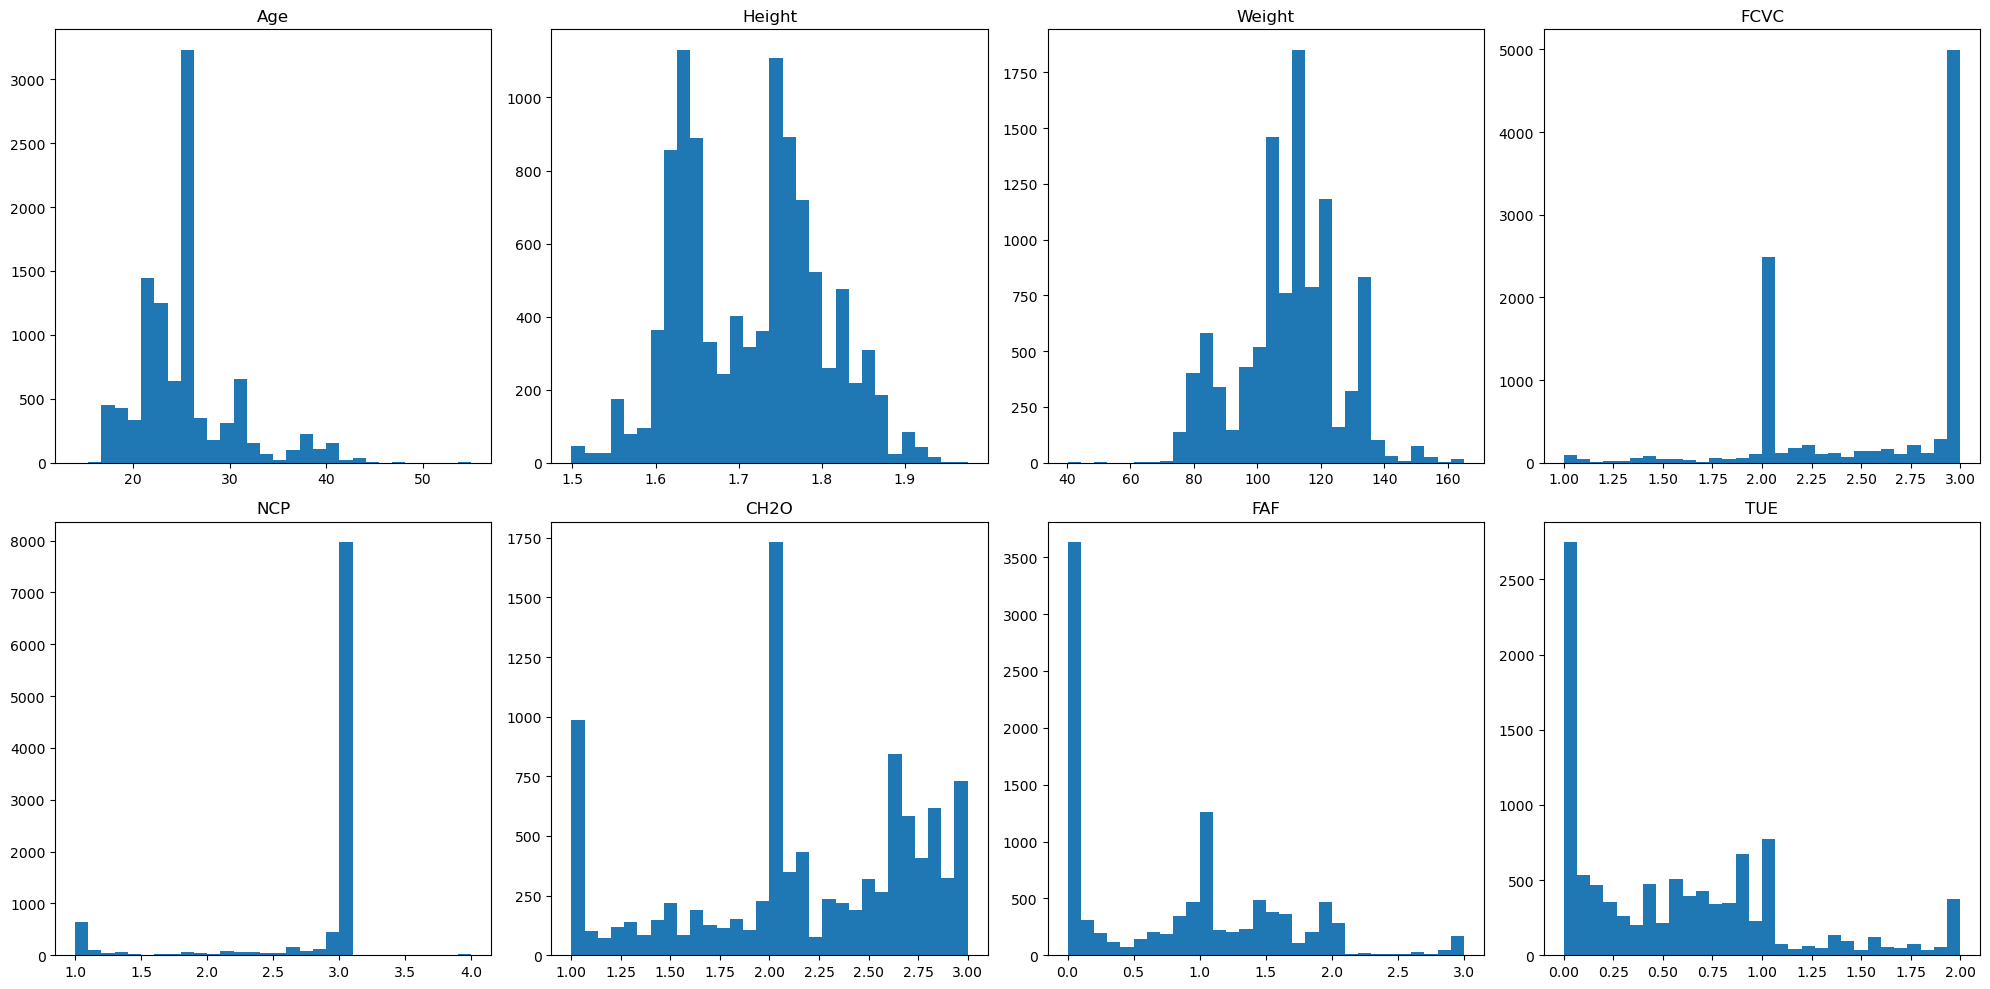

In [18]:
# Check distribution for obesity classes

plt.figure(figsize=(20, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    plt.hist(df_obesity[col],bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()

##### Similar to the earlier boxplots, the histograms help us to understand about the obesity data. 
##### We can see some features are not well distributed like FCVC and NCP, we will keep them this way, ensemble model will handle this.

### 3.4 Obesity Level Distribution

In [19]:
# Obesity_Level distribution
df['obesity_status'].value_counts()

obesity_status
overweight         4949
obesity_class_3    4046
obesity_class_2    3248
normal             3082
obesity_class_1    2910
underweight        2523
Name: count, dtype: int64

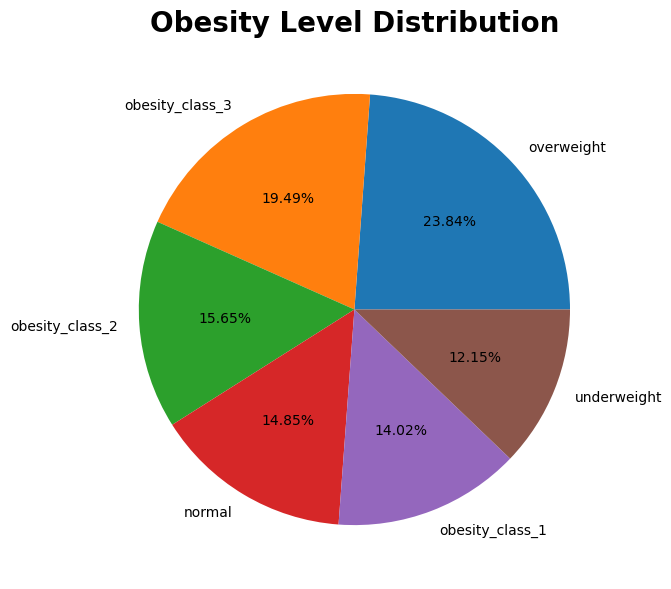

In [20]:
# Obesity_Level distribution

unique = list(df['obesity_status'].value_counts().index)
count = df['obesity_status'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(x=count, labels=unique, autopct='%.2f%%')
plt.title('Obesity Level Distribution', fontsize=20, weight='bold')
plt.show()

##### obesity_status distribution is quite balance, range from 12.15% to 19.49%.  
##### Class overweight is the highest, 23.84% and underweight is the lowest, 12.15%.

---
### 3.5 Check That High BMI Not Always Obese

##### Based on the dataset, we found that high BMI does not mean that the person is obese.

##### For better understanding, we create a simplified dataset for visualization as below.

In [21]:
df_simplified = df[['Gender', 'Age', 'Height', 'Weight']]
df_simplified['BMI'] = df['Weight']/ (df['Height']**2)
df_simplified['obesity_status'] = df['obesity_status'].replace({'underweight':'not_obese',
                                                              'normal':'not_obese',
                                                              'overweight':'not_obese',
                                                              'obesity_class_1':'obese',
                                                              'obesity_class_2':'obese',
                                                              'obesity_class_3':'obese'
                                                             })
df_simplified.head()

/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16043/4161277046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['BMI'] = df['Weight']/ (df['Height']**2)
/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16043/4161277046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['obesity_status'] = df['obesity_status'].replace({'underweight':'not_obese',


,Gender,Age,Height,Weight,BMI,obesity_status
0,Male,24.443011,1.699998,81.669950,28.259565,not_obese
1,Female,18.000000,1.560000,57.000000,23.422091,not_obese
2,Female,18.000000,1.711460,50.165754,17.126706,not_obese
3,Female,20.952737,1.710730,131.274851,44.855798,obese
4,Male,31.641081,1.914186,93.798055,25.599151,not_obese


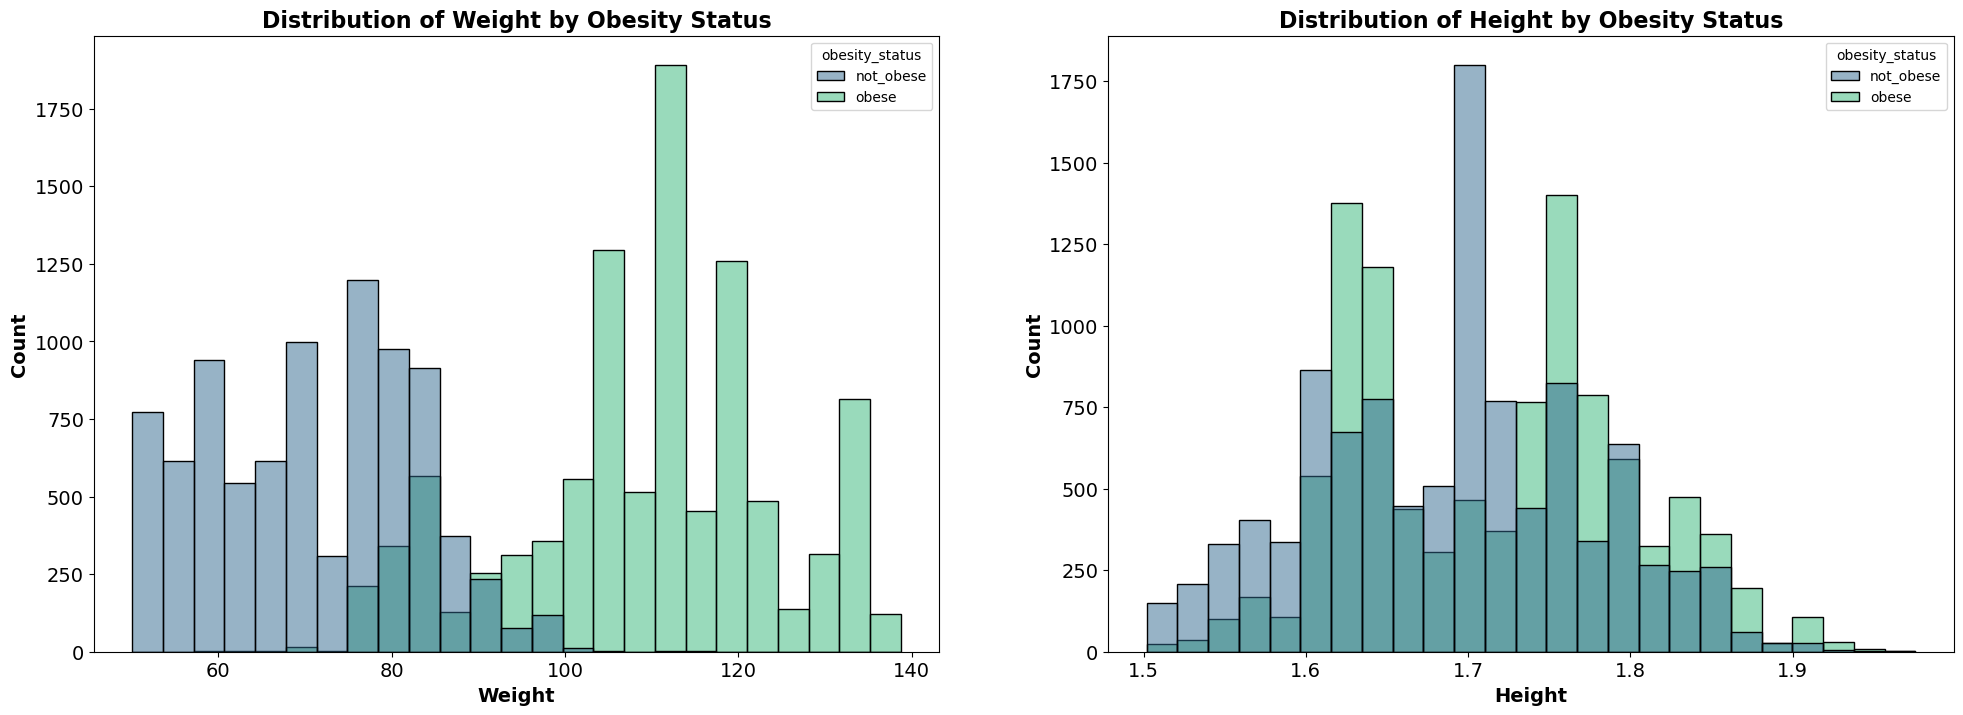

In [22]:
# Check Height and Weight
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
sns.histplot(df_simplified[(df_simplified['Weight']>50)&(df_simplified['Weight']<140)], bins=25, x='Weight', hue='obesity_status', palette='viridis', ax=ax[0], alpha=0.5)
ax[0].set_title('Distribution of Weight by Obesity Status', fontsize=16, weight='bold')
ax[0].set_xlabel('Weight', fontsize=14, weight='bold')
ax[0].set_ylabel('Count', fontsize=14, weight='bold')
ax[0].tick_params(axis='both', labelsize=14)

sns.histplot(df_simplified[(df_simplified['Height']>1.5)&(df_simplified['Height']<2)], bins=25, x='Height', hue='obesity_status', palette='viridis', ax=ax[1], alpha=0.5)
ax[1].set_title('Distribution of Height by Obesity Status', fontsize=16, weight='bold')
ax[1].set_xlabel('Height', fontsize=14, weight='bold')
ax[1].set_ylabel('Count', fontsize=14, weight='bold')
ax[1].tick_params(axis='both', labelsize=14)

plt.show()

##### Based on Distribution of weight plot above, there are overlap of obese and non-obese between weight 70 to 100.

##### The distribution of height plot shows that both obese and non-obese individuals exist across the entire height range.

##### To see it better, let's create BMI feature and look it together with obesity status below

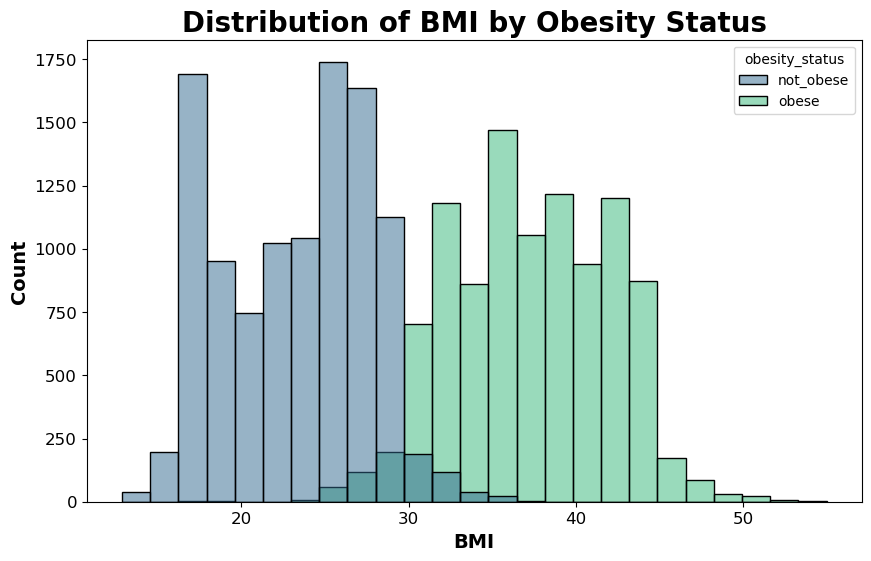

In [23]:
# plotting BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_simplified, bins=25, x='BMI', hue='obesity_status', palette='viridis', alpha=0.5)

plt.title('Distribution of BMI by Obesity Status', fontsize=20, weight='bold')

plt.xlabel('BMI', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

##### There are non-obese with BMI > 30.

In [24]:
# BMI > 30 but not obese.
df_simplified[(df_simplified['BMI']>30) & (df_simplified['obesity_status']=='not_obese')]

,Gender,Age,Height,Weight,BMI,obesity_status
29,Female,23.000000,1.550000,80.000000,33.298647,not_obese
124,Male,22.771612,1.769328,96.875502,30.945483,not_obese
139,Female,19.633898,1.500000,71.602622,31.823388,not_obese
186,Male,21.000000,1.650000,83.000000,30.486685,not_obese
294,Male,18.000000,1.650000,85.000000,31.221304,not_obese
...,...,...,...,...,...,...
20590,Male,17.992717,1.654067,83.016968,30.343151,not_obese
20603,Female,18.000000,1.560000,80.000000,32.873110,not_obese
20631,Female,23.000000,1.584951,80.562213,32.070055,not_obese
20725,Female,38.943282,1.565366,80.000000,32.648121,not_obese


In [25]:
# BMI > 35 but not obese.
df_simplified[(df_simplified['BMI']>35) & (df_simplified['obesity_status']=='not_obese')]

,Gender,Age,Height,Weight,BMI,obesity_status
453,Male,33.185661,1.700627,103.669116,35.845220,not_obese
1946,Female,35.125401,1.507867,79.989789,35.181024,not_obese
2841,Female,40.702771,1.500000,79.252472,35.223321,not_obese
3527,Female,37.965430,1.508908,80.000000,35.136983,not_obese
3684,Female,34.176795,1.505387,79.697278,35.167959,not_obese
4590,Male,39.825592,1.502609,79.414603,35.172918,not_obese
5965,Female,55.000000,1.500000,80.000000,35.555556,not_obese
6217,Female,25.000000,1.500000,80.000000,35.555556,not_obese
7181,Female,38.445148,1.498561,80.000000,35.623873,not_obese
7952,Female,20.242237,1.507106,80.790813,35.569223,not_obese


##### We can see that BMI > 30 doesn't always mean obese.  
##### There're other factors like muscle mass (muscle is heavier than fat), physical activity, age, etc.

---
### 3.6 Additional EDA

In [26]:
# Added FAF (physical activities frequency) and MTRANS (mode of transporting)
df_simplified['FAF'] = df['FAF']
df_simplified['MTRANS'] = df['MTRANS']
df_simplified.head()

/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16043/1530012475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['FAF'] = df['FAF']
/var/folders/p4/69_wbmy1275g6vc8jw1vvhf00000gn/T/ipykernel_16043/1530012475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['MTRANS'] = df['MTRANS']


,Gender,Age,Height,Weight,BMI,obesity_status,FAF,MTRANS
0,Male,24.443011,1.699998,81.669950,28.259565,not_obese,0.000000,Public_Transportation
1,Female,18.000000,1.560000,57.000000,23.422091,not_obese,1.000000,Automobile
2,Female,18.000000,1.711460,50.165754,17.126706,not_obese,0.866045,Public_Transportation
3,Female,20.952737,1.710730,131.274851,44.855798,obese,1.467863,Public_Transportation
4,Male,31.641081,1.914186,93.798055,25.599151,not_obese,1.967973,Public_Transportation


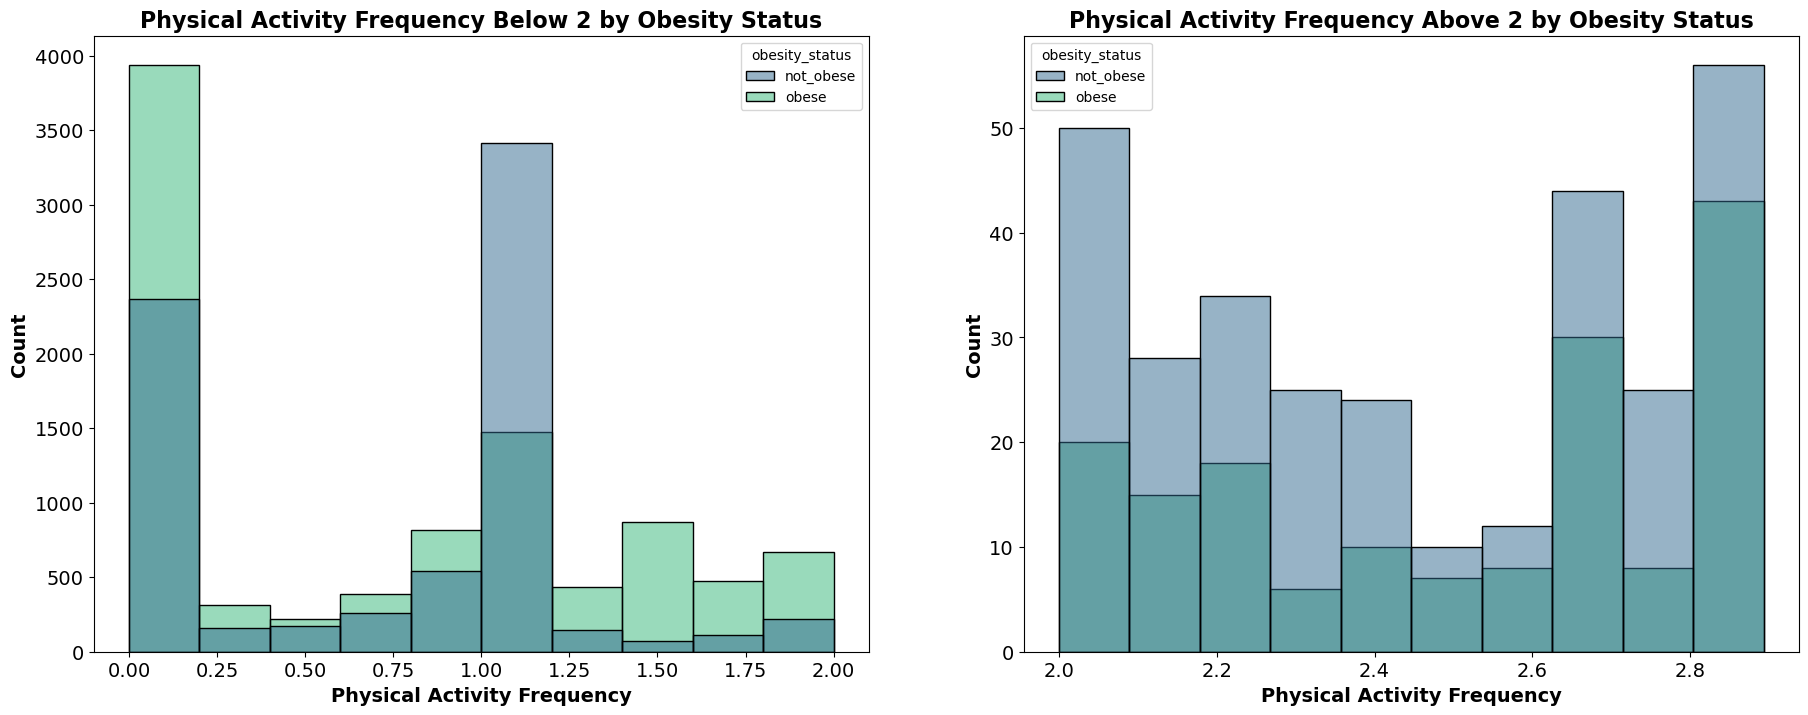

In [27]:
# Check Number of Exercise in a Week
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.histplot(data=df_simplified[(df_simplified['FAF']<2)], x='FAF', bins=10, hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[0])
ax[0].set_title('Physical Activity Frequency Below 2 by Obesity Status', fontsize=16, weight='bold')
ax[0].set_xlabel('Physical Activity Frequency', fontsize=14, weight='bold')
ax[0].set_ylabel('Count', fontsize=14, weight='bold')
ax[0].tick_params(axis='both', labelsize=14)

sns.histplot(data=df_simplified[(df_simplified['FAF']>2) & (df_simplified['FAF']<2.9)], x='FAF', hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[1])
ax[1].set_title('Physical Activity Frequency Above 2 by Obesity Status', fontsize=16, weight='bold')
ax[1].set_xlabel('Physical Activity Frequency', fontsize=14, weight='bold')
ax[1].set_ylabel('Count', fontsize=14, weight='bold')
ax[1].tick_params(axis='both', labelsize=14)

plt.show()

FAF (Physical Activity Frequency)
0 to 0.99: Inactive or very low frequency of physical activity.  
1 to 1.99: Engages in light or infrequent physical activity, possibly once a week or sporadically.  
2 to 2.99: Moderately active, likely engages in physical activity several times a week.  
3: Highly active, engaging in physical activity almost daily or with high intensity.  
##### We can see that the higher the number, the lower of obesity percentage.

---

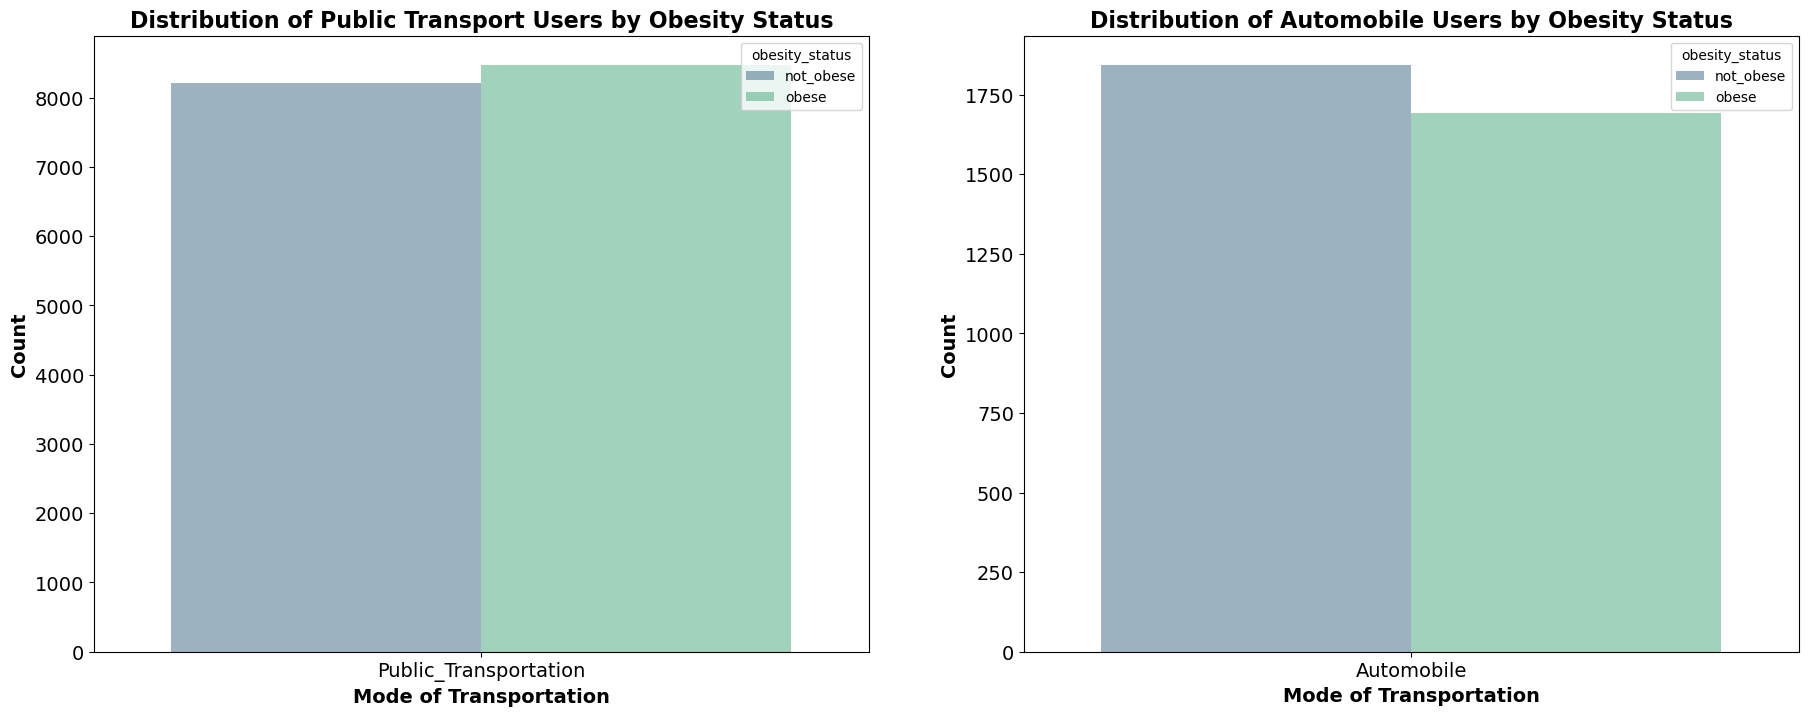

In [28]:
# Check Height and Weight
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.countplot(data=df_simplified[df_simplified['MTRANS']=='Public_Transportation'], x='MTRANS', hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution of Public Transport Users by Obesity Status', fontsize=16, weight='bold')
ax[0].set_xlabel('Mode of Transportation', fontsize=14, weight='bold')
ax[0].set_ylabel('Count', fontsize=14, weight='bold')
ax[0].tick_params(axis='both', labelsize=14)

sns.countplot(data=df_simplified[df_simplified['MTRANS']=='Automobile'], x='MTRANS', hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[1])
ax[1].set_title('Distribution of Automobile Users by Obesity Status', fontsize=16, weight='bold')
ax[1].set_xlabel('Mode of Transportation', fontsize=14, weight='bold')
ax[1].set_ylabel('Count', fontsize=14, weight='bold')
ax[1].tick_params(axis='both', labelsize=14)

plt.show()

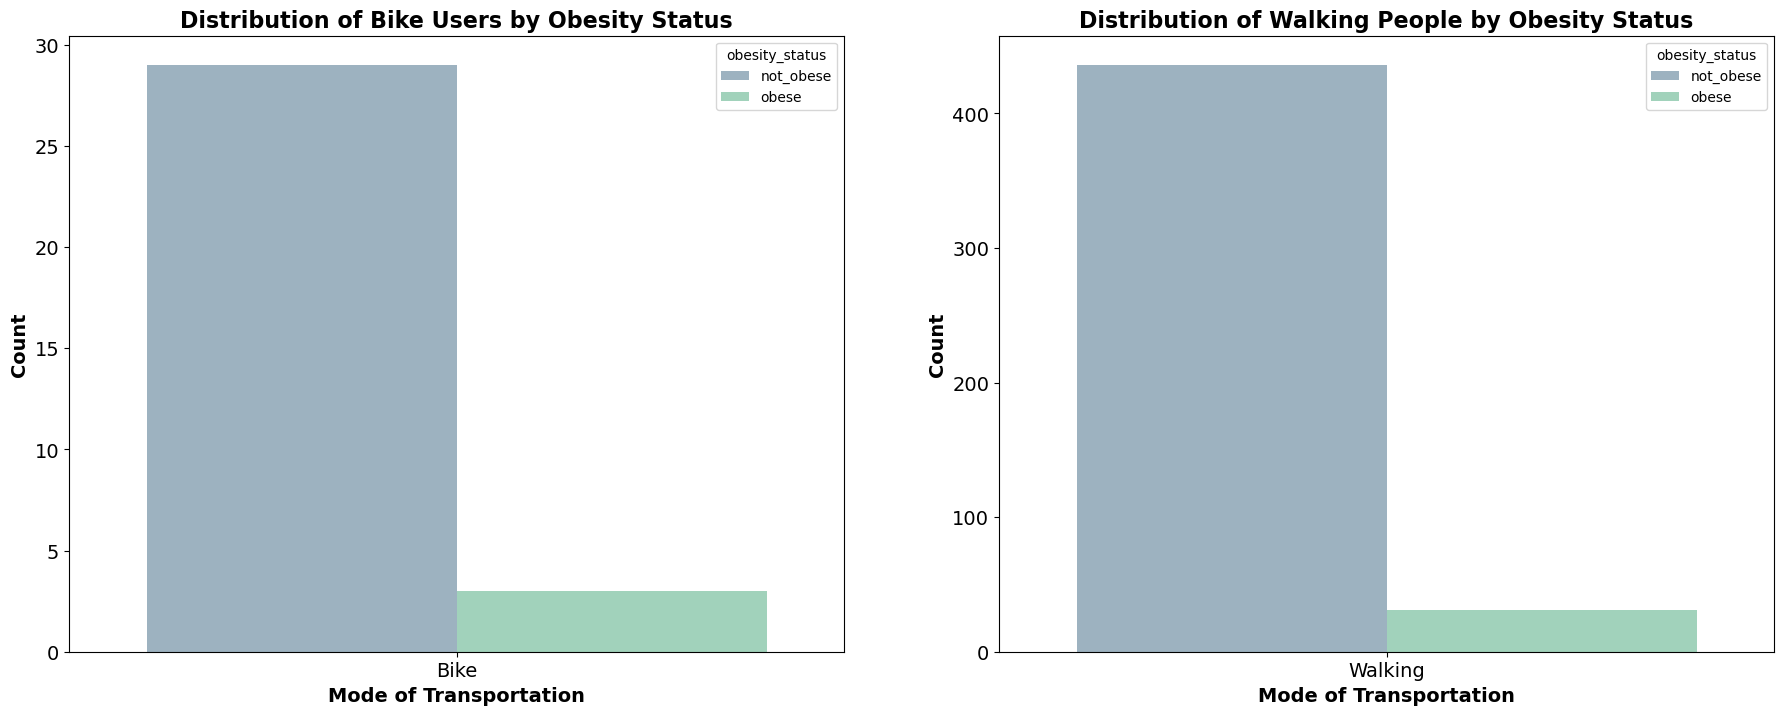

In [29]:
# Check Height and Weight
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

sns.countplot(data=df_simplified[df_simplified['MTRANS']=='Bike'], x='MTRANS', hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution of Bike Users by Obesity Status', fontsize=16, weight='bold')
ax[0].set_xlabel('Mode of Transportation', fontsize=14, weight='bold')
ax[0].set_ylabel('Count', fontsize=14, weight='bold')
ax[0].tick_params(axis='both', labelsize=14)

sns.countplot(data=df_simplified[df_simplified['MTRANS']=='Walking'], x='MTRANS', hue='obesity_status', palette='viridis', alpha=0.5, ax=ax[1])
ax[1].set_title('Distribution of Walking People by Obesity Status', fontsize=16, weight='bold')
ax[1].set_xlabel('Mode of Transportation', fontsize=14, weight='bold')
ax[1].set_ylabel('Count', fontsize=14, weight='bold')
ax[1].tick_params(axis='both', labelsize=14)


plt.show()

##### We can see that people who walk and ride bike has lesser percentage to obesity compared to people who use public transportation and automobile.

## 4. Export Clean Data

In [30]:
# export cleaned data to csv
df.to_csv('../datasets/obesity_level_clean.csv', index=False)

##### We have cleaned and understand the data for obesity. In the next notebook 1.1, we will clean the stroke data for the stroke detector model. 